<pre>
Name: Ritika Sarkar 
Reg. No.: 19BAI1031 
Faculty: Dr. G. Suganya 
Slot: L3 + L4 
Course Code: CSE1015 
Date: 10.05.2021
</pre>

## K-Medoid Clustering (Unsupervised Learning)

Link to dataset : https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Country-data.csv')

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data description
<pre>
- country
Name of the country
- child_mort
Death of children under 5 years of age per 1000 live births
- exports
Exports of goods and services per capita. Given as %age of the GDP per capita
- health
Total health spending per capita. Given as %age of GDP per capita
- imports
Imports of goods and services per capita. Given as %age of the GDP per capita
- Income
Net income per person
- Inflation
The measurement of the annual growth rate of the Total GDP
- life_expec
The average number of years a new born child would live if the current mortality patterns are to rem...
- total_fer
The number of children that would be born to each woman if the current age-fertility rates remain th...
- gdpp
The GDP per capita. Calculated as the Total GDP divided by the total population.
</pre>

Exploratory data analysis

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.shape

(167, 10)

In [6]:
# country is the only column containing strings

In [7]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
df.isnull().sum() # checking missing values

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

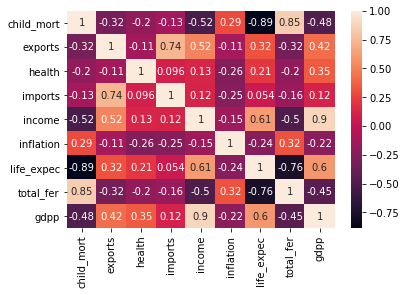

In [9]:
sns.heatmap(df.corr(),annot=True) # checking correlation

Here we observe that 
- income and gdpp 
- imports and exports
- child_mort and total_fer 
have high positive correlation respectively 
- On the other hand, life_expec and child_mort, life_expec and total_fer have high negative correlation

Data cleaning for modelling

In [10]:
df['country'].nunique()

167

In [11]:
# the country column has all unique values so we'll drop it
df.drop('country',axis=1, inplace=True) # DON'T RUN THIS CELL TWICE

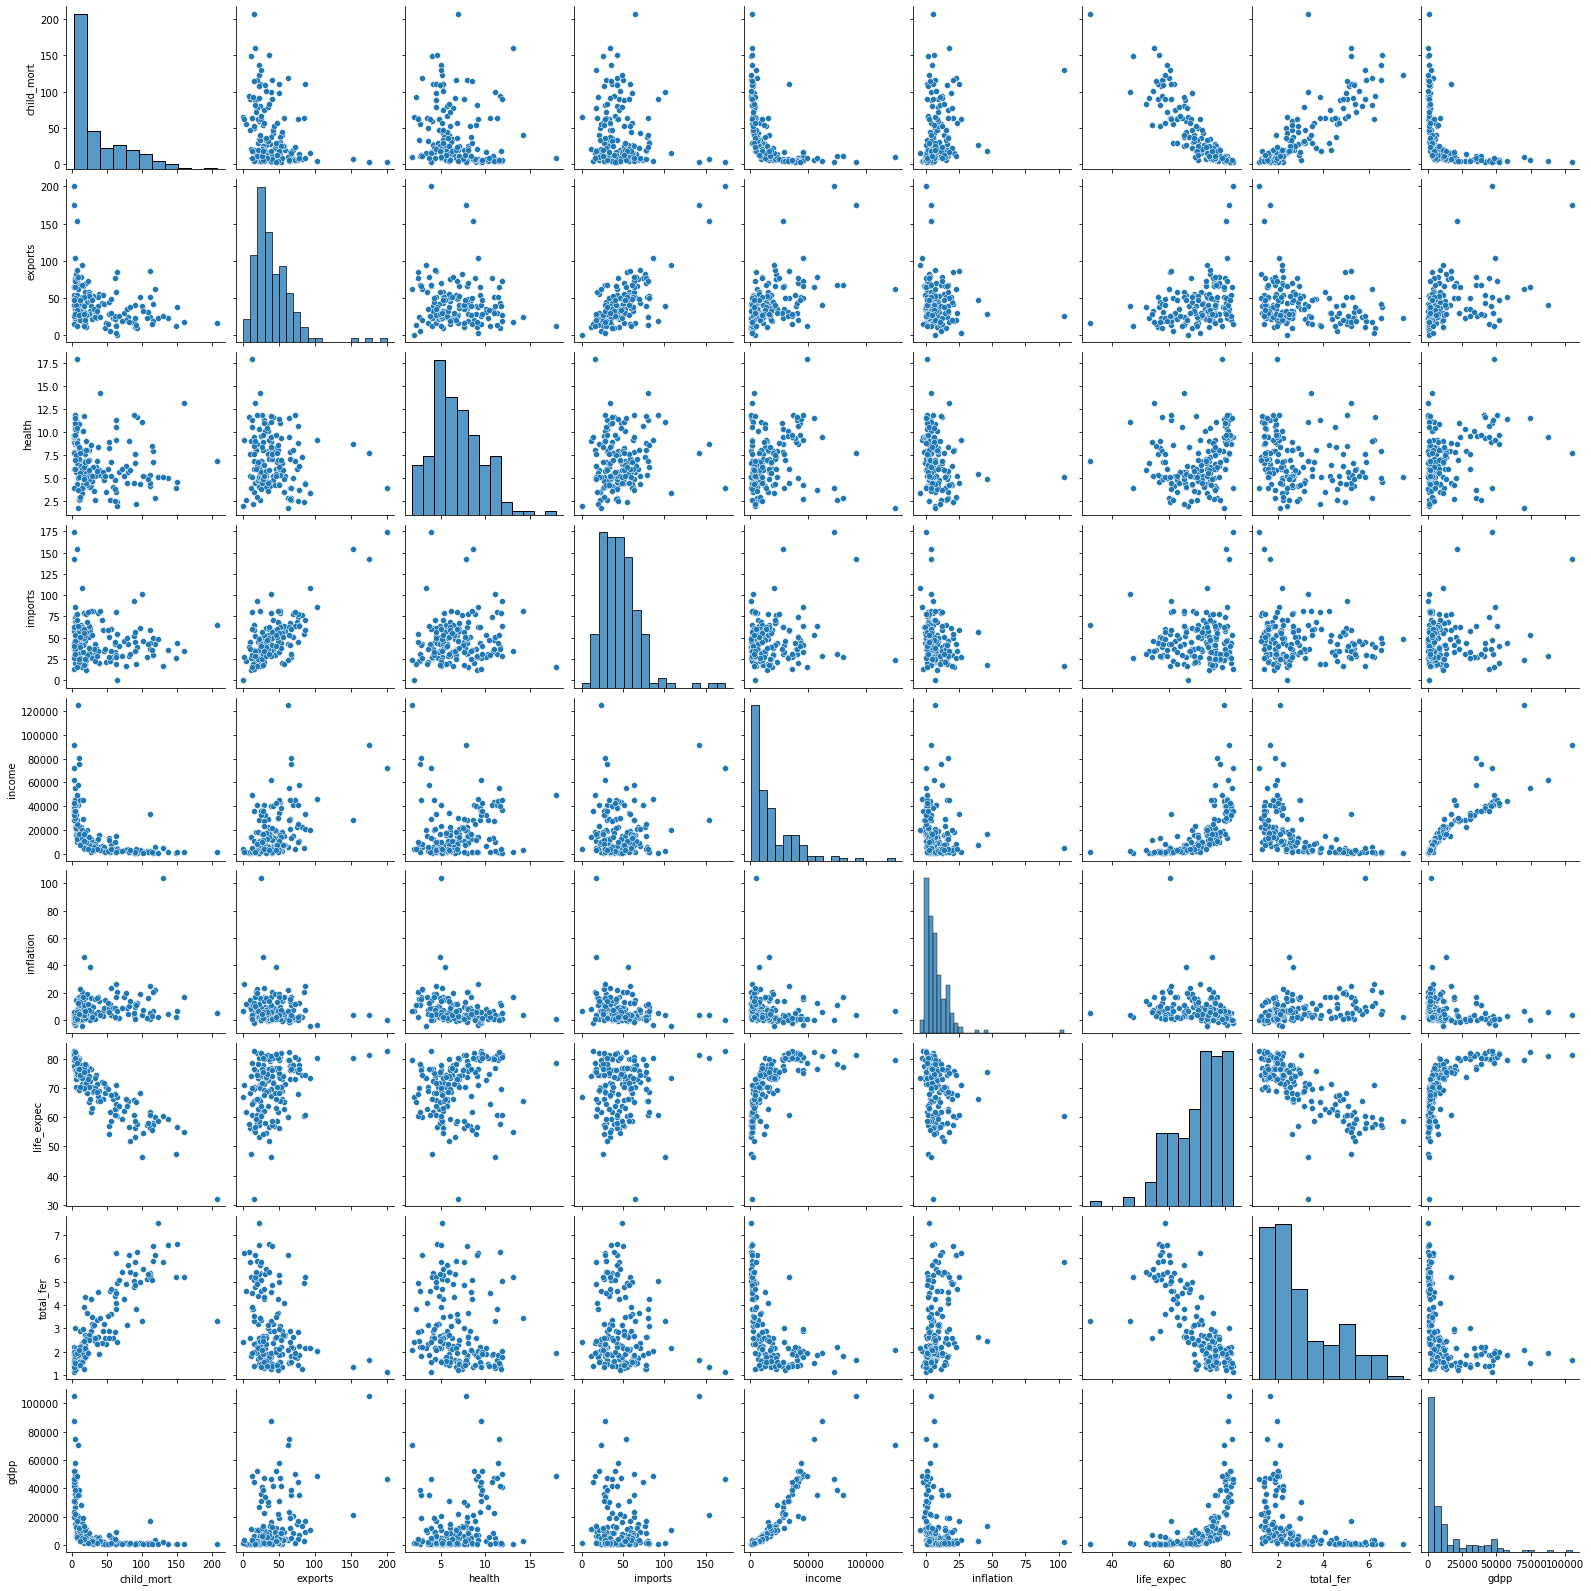

In [12]:
# to check the relations among the different columns
sns.pairplot(df)

In [13]:
# we should normalise the data as gdpp and income contain quite high values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df)

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [14]:
new_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
new_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Choosing k - Elbow method

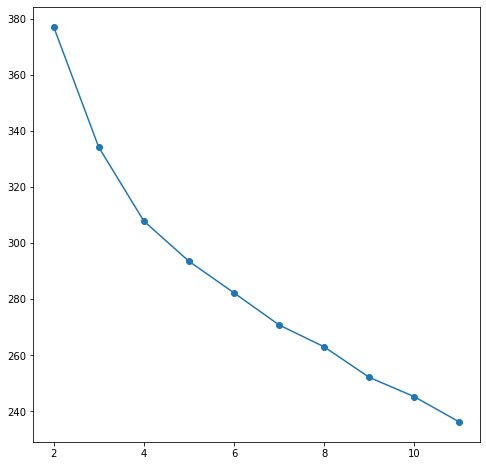

In [15]:
from sklearn_extra.cluster import KMedoids
# choosing k using elbow method
metric = []
cluster = []
for k in range(2,12):
    km = KMedoids(n_clusters=k, method='pam',init='k-medoids++')
    km.fit(new_df)
    cluster.append(k)
    metric.append(km.inertia_) # sum of squares of distances

plt.figure(figsize=(8,8))
plt.plot(cluster,metric,marker='o')
plt.show()

Here we observe that the graph bends around k = 3 (inflexion point)
- So we choose k = 3

## Modelling

In [16]:
km = KMedoids(n_clusters=3, method='pam',init='k-medoids++')
km.fit(new_df)

KMedoids(init='k-medoids++', method='pam', n_clusters=3)

In [17]:
km.labels_ # final labels for the instances, found out using clustering

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int64)

In [18]:
km.cluster_centers_ # medoids of the 3 clusters

array([[-0.51905236,  0.34361828, -0.22116716,  0.34841887, -0.35091554,
        -0.37592082,  0.71553683, -0.53532078, -0.48288707],
       [-0.87719   , -0.08814462,  0.77934365, -0.39318127,  1.1787202 ,
        -0.70507894,  1.06516724, -0.71421068,  1.81877565],
       [ 0.83639913, -0.81994613, -0.29419715, -0.73705173, -0.78327176,
         0.13930796, -1.26946162,  1.64448575, -0.67102583]])

In [19]:
km.inertia_

334.213544643036

## Metrics - Silhouette score

Drawback of using inertia as a metric is that, lower inertia is observed for higher values of k. So if we increase k then we'll get more clusters which may lead to excessive unnecessary partitioning of the data. And for lower k, it obviously gives more inertia which means the model may not be able to map all the clusters. So to find the optimal value of k in a more precise way, we use the silhouette_score
- silhouette_score is the mean silhouette coefficient over all the instances. 

In [21]:
# using silhoutte score
from sklearn.metrics import silhouette_score
silhouette_score(new_df,km.labels_)

0.2810419153107105

The Silhouette score is quite low, so we'll plot a graph to see if there exists another k which has a better score

In [22]:
cluster

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

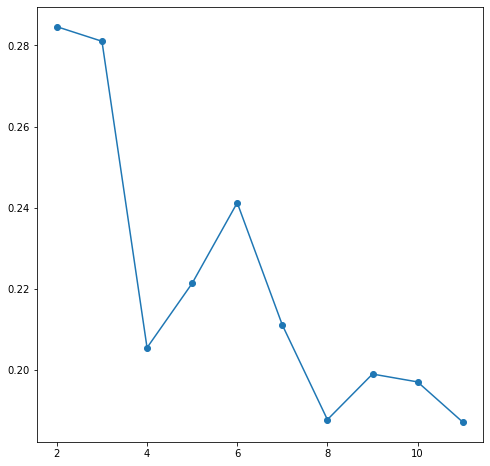

In [23]:
# choosing k using silhouette scores
sscore = []
for k in cluster:
    km1 = KMedoids(n_clusters=k, method='pam',init='k-medoids++')
    km1.fit(new_df)
    sscore.append(silhouette_score(new_df,km1.labels_))

plt.figure(figsize=(8,8))
plt.plot(cluster,sscore,marker='o')
plt.show()

We observe that k = 3 gives a better model, because the silhouette score is higher. If its closer to 0, that means the cluster points are closer to a cluster boundary and don't have good affinity towards the cluster

No need for remodelling. We'll proceed with k=3

In [24]:
pred = km.labels_

In [25]:
# add new column
df['Cluster'] = pred
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [26]:
df['Cluster'].nunique()

3

## Visualising the clusters

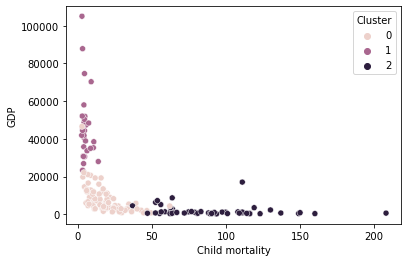

In [27]:
# child mortality vs GDP
sns.scatterplot(x= df['child_mort'],y=df['gdpp'],hue='Cluster', data = df)
plt.xlabel('Child mortality')
plt.ylabel('GDP')
plt.show()

- Economically well-off countries, i.e. with high GDP, have low infant mortality.
- Countries with lower GDP have relatively more infant mortality.
- Countries which have very low GDP have high infant mortality.

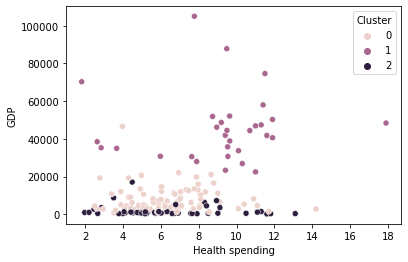

In [28]:
# Health vs GDP
sns.scatterplot(x= df['health'],y=df['gdpp'],hue='Cluster', data = df)
plt.xlabel('Health spending')
plt.ylabel('GDP')
plt.show()

- The countries having high GDP can allocate more funds for health
- Countries having lower GDP have lower spending on health
- Counties having very low GDP have poor spending on health 

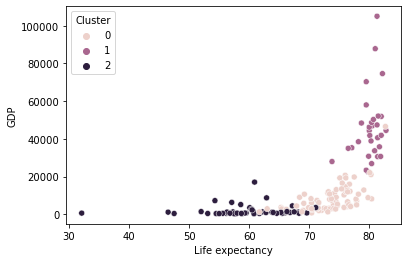

In [29]:
# Life Expectancy vs GDP
sns.scatterplot(x= df['life_expec'],y=df['gdpp'],hue='Cluster', data = df)
plt.xlabel('Life expectancy')
plt.ylabel('GDP')
plt.show()

- The countries having high GDP have more life expectancy
- Countries having lower GDP have lower life expectancy
- Counties having very low GDP have poor life expectancy

In [30]:
df['Cluster'].value_counts()

0    85
2    51
1    31
Name: Cluster, dtype: int64